In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('SA_AAL_estPropA.csv')
#df = df.drop(df.columns[0], axis = 'columns')
df.shape
df.head()
# .csv prerocessing pipeline in clustering.pynb file

,Unnamed: 0,PreCG_L_SA,SFGdor_L_SA,ORBsup_L_SA,MFG_L_SA,ORBmid_L_SA,IFGoperc_L_SA,IFGtriang_L_SA,ORBinf_L_SA,ROL_L_SA,...,SMG_R_SA,ANG_R_SA,PCUN_R_SA,PCL_R_SA,HES_R_SA,STG_R_SA,TPOsup_R_SA,MTG_R_SA,TPOmid_R_SA,ITG_R_SA
0,PreCG_L_SA,1.0000,1.0000,0.8808,1.0,0.9256,1.0,1.0000,1.0000,1.0000,...,0.8312,0.7842,1.0000,0.9024,0.8110,0.8331,1.0000,0.9818,0.8042,1.0000
1,SFGdor_L_SA,1.0000,1.0000,0.9189,1.0,0.7645,1.0,0.8382,0.7414,1.0000,...,0.3758,1.0000,1.0000,0.9258,0.6636,0.7735,0.8689,0.8347,0.6427,0.7782
2,ORBsup_L_SA,0.9280,0.9607,1.0000,1.0,0.7919,1.0,1.0000,1.0000,1.0000,...,0.7608,0.9722,1.0000,0.8467,0.8219,1.0000,0.9791,0.8936,0.6081,1.0000
3,MFG_L_SA,1.0000,1.0000,1.0000,1.0,1.0000,1.0,1.0000,1.0000,0.9119,...,0.9195,1.0000,0.9402,0.9235,0.7016,0.7807,0.9519,1.0000,0.5789,1.0000
4,ORBmid_L_SA,0.9645,0.9061,0.8225,1.0,1.0000,1.0,0.0000,0.7443,0.9306,...,0.5381,1.0000,0.8804,0.7556,0.5598,0.1014,0.9977,0.9775,0.1466,1.0000


In [4]:
# Separating out & normalizing the features
x = df.iloc[:, 1:79].values
x = preprocessing.scale(x)
y = df.iloc[:, 0].values

In [5]:
#targets = list(df.columns)
targets = y
y

array(['PreCG_L_SA', 'SFGdor_L_SA', 'ORBsup_L_SA', 'MFG_L_SA',
       'ORBmid_L_SA', 'IFGoperc_L_SA', 'IFGtriang_L_SA', 'ORBinf_L_SA',
       'ROL_L_SA', 'SMA_L_SA', 'OLF_L_SA', 'SFGmed_L_SA', 'ORBsupmed_L_SA',
       'REC_L_SA', 'INS_L_SA', 'ACG_L_SA', 'DCG_L_SA', 'PCG_L_SA',
       'PHG_L_SA', 'CAL_L_SA', 'CUN_L_SA', 'LING_L_SA', 'SOG_L_SA',
       'MOG_L_SA', 'IOG_L_SA', 'FFG_L_SA', 'PoCG_L_SA', 'SPG_L_SA',
       'IPL_L_SA', 'SMG_L_SA', 'ANG_L_SA', 'PCUN_L_SA', 'PCL_L_SA',
       'HES_L_SA', 'STG_L_SA', 'TPOsup_L_SA', 'MTG_L_SA', 'TPOmid_L_SA',
       'ITG_L_SA', 'PreCG_R_SA', 'SFGdor_R_SA', 'ORBsup_R_SA', 'MFG_R_SA',
       'ORBmid_R_SA', 'IFGoperc_R_SA', 'IFGtriang_R_SA', 'ORBinf_R_SA',
       'ROL_R_SA', 'SMA_R_SA', 'OLF_R_SA', 'SFGmed_R_SA', 'ORBsupmed_R_SA',
       'REC_R_SA', 'INS_R_SA', 'ACG_R_SA', 'DCG_R_SA', 'PCG_R_SA',
       'PHG_R_SA', 'CAL_R_SA', 'CUN_R_SA', 'LING_R_SA', 'SOG_R_SA',
       'MOG_R_SA', 'IOG_R_SA', 'FFG_R_SA', 'PoCG_R_SA', 'SPG_R_SA',
       'IPL_R_SA', 

In [24]:
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
# finalDf = pd.concat([principalDf, df.iloc[:, 0]], axis = 1)
# pca.explained_variance_ratio_

def pca_script(n, x): # n = number of components, x features
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(x)
    a = []
    for i in range(1,n+1):
        a.append("PCA_"+str(n))
    principalDf = pd.DataFrame(data = principalComponents, columns = a)
    finalDf = pd.concat([principalDf, df.iloc[:, 0]], axis = 1)
    #print(pca.explained_variance_ratio_)
pca_script(4,x)
print(pca.explained_variance_ratio_)

[ 0.20523434  0.06895159]


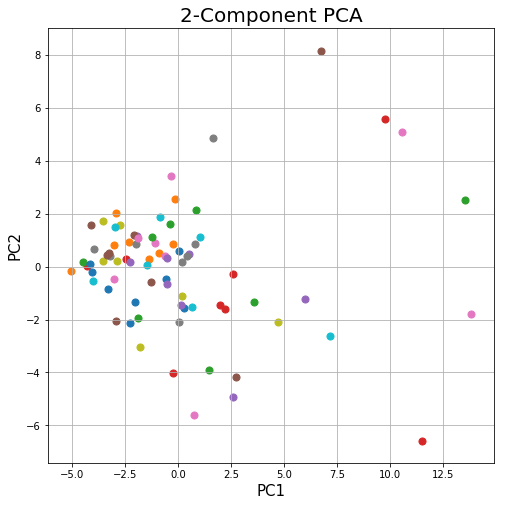

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2-Component PCA', fontsize = 20)
for target in targets:
     indicesToKeep = df.iloc[:, 0].values == target
     ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
                , finalDf.loc[indicesToKeep, 'PC2']
                #, c = color
                , s = 50)
ax.grid()

In [ ]:
##### TEST: How many components to select ##### 

In [187]:
    ### Testing 7 components ### 
        # pca = PCA(n_components=7)
        # principalComponents = pca.fit_transform(x)
        # principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])
        # pca.explained_variance_ratio_
            # OUTPUT: array([ 0.23354774,  0.11475039,  0.06810382,  0.04120661,  0.03132366,
                #0.02704538,  0.02453726])

array([ 0.23354774,  0.11475039,  0.06810382,  0.04120661,  0.03132366,
        0.02704538,  0.02453726])

In [ ]:
    ### Conclusion ### 
        # We selected the first two principal components (PCs) because the additional components
        # explain less than 7% of the variance 
        # (PC1: 23.4% of the variance; P2: 11.5% of the variance).

In [7]:
### Variance explained by each component ###
pca.explained_variance_ratio_
    # OUTPUT: array([ 0.23354774,  0.11475039])

array([ 0.233734  ,  0.11484077])

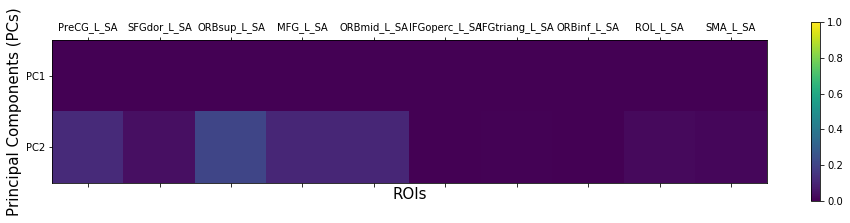

In [9]:
### FUNCTION to generate heat map of each PC explained by descriptors ###

def heat_map(ar, n,m):
    c = np.delete(ar,0,0)
    c = c.astype(np.float)
    plt.matshow(c,cmap='viridis',vmin=n,vmax=m)
    plt.yticks([0,1],['PC1','PC2'],fontsize=10)
    t = c.shape[1]
    
    plt.xticks(range(int(t)), ar[0])
    plt.xlabel("ROIs", fontsize = 15)
    plt.ylabel("Principal Components (PCs)", fontsize = 15)
    plt.colorbar()
    plt.show()

### Example: first 10 descriptors ###
b = np.asarray(pca.components_[0,0:10])
c = np.asarray(pca.components_[1,0:10])
a = df.columns[1:11]
d = [a,b,c]
heat_map(d, 0, 1)

In [19]:
### How much each feature contributes to each component
pca.components_
a = np.asarray(pca.components_)
a.shape

(2, 1402)

In [20]:
##### Important Feature Extraction #####
    # Function: Thresholds & Displays the Data
    # c: array where rows = components, columns = descriptors, entries = contribution of descriptor to respective component
def data_threshold(c,n, min, max):
    threshold = n
    d = c[1,:].astype(float) + c[2,:].astype(float)
    d=d.reshape(1,c.shape[1])
    d = np.vstack((d, d, d))
    e=c[d > n]
    e=np.asarray(e)
    t = e.shape[0]

    # number of descriptors that respect the threshold
    t= t/3
    print(t)

    f=(e[0:int(t)])
    g=(e[int(t):int(2*t)])
    h=(e[int(2*t):int(3*t)])

        # creating array with only columns from c that respect threshold!
    final = np.vstack((f, g, h))
    ###print(final.shape)
    pd.DataFrame(final).to_csv("descript_"+str(n)+".csv")
    heat_map(final,min,max)

10.0


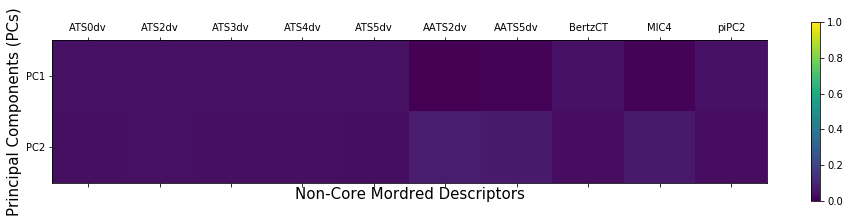

In [22]:
#### TEST: Thresholding & Displaying Data
features = list(df.columns)
features.pop(0)
features
b = []
b.append(features)
b.append(a[0])
b.append(a[1])
c = np.asarray(b)
c.shape
data_threshold(c, 0.08,0,1)

In [18]:
print(c.shape)

(3, 1402)
